# Premier League Club Investment Analysis for an Investment company (EDA) 
## Python Project_1_Cohort-2_Vishnupriya


## Objective:
The management of the firm aims to invest in one of the top-performing club in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, the firm wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

In [1]:
# importing libraries & data set
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('premier_league_final_data.csv')

## 1. Exploring dataset

In [3]:
# to view top 5 rows of data
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [4]:
# to view bottom 5 rows of data
df.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
35,36West Bromwich Albion,494,117,238,139,510,107,1878,NaN,0,Apr-18
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0,Apr-23
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0,Apr-13
38,39Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0,Apr-23
39,40Portsmouth,266,79,122,65,292,61,April 1898,NaN,NaN,Apr-10


In [5]:
# to find no. of rows & colums in dataset
print(df.shape)

(40, 11)


In [6]:
# to find column & rows details including column names,count & data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


In [7]:
# to Check the total number of missing values in each column in the dataset 
missing_values = df.isnull().sum()
missing_values

Club               0
Matches Played     0
Win                0
Loss               0
Drawn              0
Goals              0
Clean Sheets       0
TeamLaunch         0
Winners           15
Runners-up        18
lastplayed_pl      0
dtype: int64

### Obsevations:
- The club name is mixed with row number, which need to clean club column.
- Runners-up column is not in numerical data type, need to change it for any numerical operations.
- Winners , runner-up coulmns have missing values, need to replce the values.
- In teamlaunch column, the year data is not in same format, need to change it.
- lastplayed_pl column is not in proper date format, need to fix it.


## 2. Cleaning the dataset


#### a) fixing club column


In [9]:
# to check if the coulmn has any digits (0 to 9) attached to a string datatype.
# print(df['Club'].str.contains('\d+'))
matches = df['Club'].str.findall(r'\d+')
#print(matches)

# In this code, '\d+' is a regular expression pattern that matches one or more digits at the start of the string.
# \d is a special character called a metacharacter that represents any digit from 0 to 9.
# + is a quantifier that specifies that the previous element (in this case, \d) should occur one or more times.
# So, when the pattern '\d+' is used, it will match any consecutive sequence of digits in a string. Here are some examples to illustrate its usage:
# The string "123" would be a match because it contains three consecutive digits.
# The string "A1B2C" would have two matches: "1" and "2".
# The string "Hello" would not have any matches because it does not contain any digits.
# The str.replace() method replaces this pattern with an empty string, 
# effectively removing the numbers from the front of each team name in the "Club" column. 

In [13]:
#df['Club'] = df['Club'].str.replace(r'\d+', '')

# here the above code is not working, so changing the digits manually using below code. (taken from chatgpt)
# Manual replacement if regex doesn't work
df['Club'] = df['Club'].apply(lambda x: ''.join(filter(lambda c: not c.isdigit(), x)))

In [14]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


#### b) Fixing winners, runners column & changing data type

In [11]:
df["Winners"].isnull().any()

True

In [12]:
df['Winners'].value_counts() 

Winners
0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: count, dtype: int64

In [13]:
#Total no of matches 
1*3+3*1+5*1+6*1+13*1

30

- from above data we see that there are total 30 matches were held as premier league, out of which 18 clubs havent win even single PL, & 1 club win 13 times a PL which is quiet impressive followed by 6 wins, 5 wins & 3 wins.
- this means, out of 40 clubs, 7 clubs only wins atleast once in PL.
- The remaining non empty values can be replaced by zero.

In [14]:
df['Winners'].fillna(0, inplace = True)
df['Winners'].isnull().any()

False

In [15]:
df['Runners-up'].isnull().any()

True

In [16]:
df['Runners-up'].value_counts() 

Runners-up
0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: count, dtype: int64

In [17]:
1*3+6*1+4*1+5*1+3*1+7*1+2*1

30

- from above data, one team won 7 times runner_up follwed by 6 , 5, 4, 3 runner_ups in PL, 10 teams havent won any runner_up in entire PL.
- Data also have miss values, need to replace with zero.
- the Runners-up is a object datatype, need to change it to int datatype.

In [18]:
df['Runners-up'].fillna(0, inplace = True)
df['Runners-up'].isnull().any()
df['Runners-up'].replace('-',0,inplace = True)  # helps to replace '-' this values.
#df['Runners-up']

In [19]:
# To convert 'Runners-up' column from 'object' to 'int' type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

In [20]:
df.info() # if we see the 'Runners-up' column coverted to int. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


#### c) Fixing the teamlaunch and lastplayed_pl column datatype

In [21]:
#### 3. Fixing In teamlaunch column, the year data is not in same format, need to change it.
df['TeamLaunch'].value_counts()

TeamLaunch
1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1895           1
1881           1
1904           1
1932           1
1912           1
1863           1
1877           1
1885           1
1867           1
1889           1
1894           1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
April 1898     1
Name: count, dtype: int64

In [22]:
# We need to convert the 'TeamLaunch' into 'YYYY'

# convert the column to datetime format
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], errors = 'coerce')
# convert the column to YYYY format
df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')
df['TeamLaunch']
# df['TeamLaunch'].value_counts()

# possible values conerted to 'yyyy' format, remaining will left as NAN (Non-Numeric value)

0     1886
1     1874
2     1875
3     1875
4     1874
5     1899
6     1901
7     1882
8     1905
9     1905
10     NaN
11    1861
12    1884
13    1878
14    1879
15     NaN
16    1919
17    1884
18    1892
19    1894
20    1878
21    1876
22    1892
23    1902
24    1865
25    1904
26    1886
27    1889
28    1867
29    1885
30    1863
31    1879
32    1912
33    1882
34    1881
35    1878
36    1895
37    1932
38    1877
39     NaN
Name: TeamLaunch, dtype: object

In [23]:
df['lastplayed_pl'].value_counts()

lastplayed_pl
Apr-23    19
Apr-22     3
Apr-17     3
Apr-18     3
May-12     2
May-11     1
May-07     1
Apr-01     1
Apr-08     1
Apr-02     1
Apr-15     1
Apr-21     1
Apr-00     1
Apr-13     1
Apr-10     1
Name: count, dtype: int64

In [24]:
# Let us extract only the year in lastplayed_pl column
df['lastplayed_pl'] = (pd.to_datetime(df['lastplayed_pl'], format='%b-%y', errors='coerce')).dt.year

In [25]:
df['lastplayed_pl'] 

0     2023
1     2023
2     2011
3     2012
4     2012
5     2023
6     2023
7     2022
8     2007
9     2023
10    2001
11    2023
12    2008
13    2023
14    2023
15    2002
16    2023
17    2023
18    2023
19    2023
20    2023
21    2017
22    2023
23    2022
24    2023
25    2017
26    2015
27    2021
28    2000
29    2023
30    2018
31    2017
32    2018
33    2023
34    2022
35    2018
36    2023
37    2013
38    2023
39    2010
Name: lastplayed_pl, dtype: int32

-The data was now clean & can be used for further analysis.

## 3. Data Analysis
#### a). Summary of the data


In [26]:
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.75,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.0,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.0,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.0,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.0,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.0,2023.000000


- From above data we see that average matches played by all clubs is around 573 followed by win & loss matches are almost same portion. The avg no of goals are 769 followed by clen sheets 167. 
- In terms of winners & runners the average is less than 1 & medium was 0 which means most of the clubs neither reach to winner/runner-up.
- Need to find clubs which gave great performance by winning 13 matches and 7 matches as runner-up.
- need to find clubs having max matches played, max wins, max draws, max goals and max cleansheets.

In [27]:
df[df['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [28]:
df[df['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

In [29]:
df[df['Win']==720]['Club']

20    Manchester United
Name: Club, dtype: object

In [30]:
df[df['Drawn']==329]['Club']

13    Everton
Name: Club, dtype: object

In [31]:
df[df['Goals']==2229]['Club']

20    Manchester United
Name: Club, dtype: object

In [32]:
df[df['Clean Sheets']==491]['Club']

20    Manchester United
Name: Club, dtype: object

- From above analysis, Manchester United club are winners of Premier league 13 times & runner-up 7 times.
- In terms of max wins, max goals, max cleansheets  Manchester United club are highest.
- In terms of max Draws, Everton club made more draws.

#### b) To get understand more about the performance of clubs, lets vizulaize each column & analyse the data.

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline    

%matplotlib inline : it is a command (in juptyer) that allows plots generated by matplotlib to be displayed directly in the notebook interface, rather than in a separate window. 

Text(0.5, 1.0, 'Histogram of Matches Played')

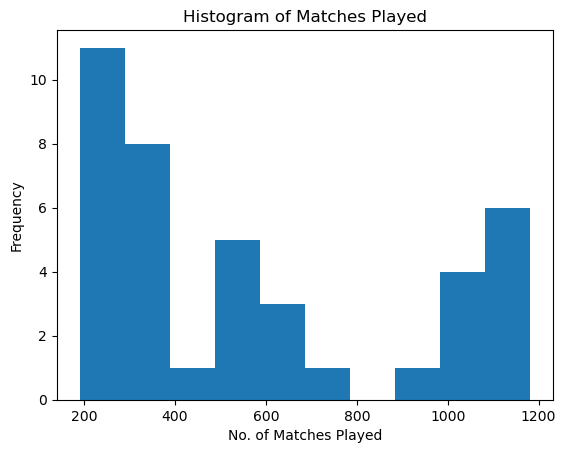

In [37]:
# Let us visualize each column

# start with Matches Played column
# plotting  histogram
plt.hist(df['Matches Played'])

# add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('Frequency')
plt.title('Histogram of Matches Played')

- from the above graph, it shows majority of clubs played around 400 matches & few clubs played >1000 matches.
- Based on ojective, few well played & experienced clubs are already taken by competitors, investor was looking for clubs having good performance clubs irrespective of their experience.
- To identify the clubs based on objective, we can consider the clubs who played less matches, i.e <800 for our further anlysis.

In [38]:
# finding no of clubs have played greter than 800 matches
df[df['Matches Played']>=800]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,2023
13,Everton,1182,424,429,329,1515,357,1878,0.0,0,2023
18,Liverpool,1182,621,270,291,2071,453,1892,1.0,5,2023
19,Manchester City,991,494,283,214,1733,344,1894,6.0,3,2023
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023
22,Newcastle United,1063,397,391,275,1426,280,1892,0.0,2,2023
29,Southampton,916,280,390,246,1103,237,1885,0.0,0,2023
33,Tottenham Hotspur,1182,518,378,286,1800,339,1882,0.0,1,2023


In [39]:
# total 11 clubs played more than 800 matches & 29 clubs played < 800 matches

In [40]:
df[df['Matches Played']<=800]['Club']

2             Birmingham City
3            Blackburn Rovers
4            Bolton Wanderers
5                 Bournemouth
6      Brighton & Hove Albion
7                     Burnley
8           Charlton Athletic
10              Coventry City
11             Crystal Palace
12               Derby County
14                     Fulham
15               Ipswich Town
16               Leeds United
17             Leicester City
21              Middlesbrough
23               Norwich City
24          Nottingham Forest
25                  Hull City
26        Queens Park Rangers
27           Sheffield United
28        Sheffield Wednesday
30                 Stoke City
31                 Sunderland
32               Swansea City
34                    Watford
35       West Bromwich Albion
37             Wigan Athletic
38    Wolverhampton Wanderers
39                 Portsmouth
Name: Club, dtype: object

In [41]:
df = df[df['Matches Played'] < 800].reset_index(drop=True) 

 # It is a method used to reset the index of a DataFrame and discard the old index.
# When you set drop=True, it means you're telling pandas to drop the old index column entirely 
# based on given condition rather than keeping it as a new column in the DataFrame.

In [42]:
df.shape

# we can see the no of rows are 29 & 11 columns, means it eliminates the 11 clubs.

(29, 11)

- Now we will see the other parameters such as win, loss, draws, goals, cleansheets and calculate % rate based on matches played by each club to deep down further on performance of clubs.

#### c)creating new columns of following:

In [82]:
df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0
5,Burnley,304,83,145,76,300,78,1882,0.0,0,2022,27.302632,47.697368,25.000000,25.657895,1.0,0.0
6,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007,30.592105,42.434211,26.973684,29.934211,1.0,0.0
7,Coventry City,354,99,143,112,387,92,NaN,0.0,0,2001,27.966102,40.395480,31.638418,25.988701,1.0,0.0
8,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023,28.759398,45.300752,25.939850,25.000000,1.0,0.0
9,Derby County,266,68,128,70,271,66,1884,0.0,0,2008,25.563910,48.120301,26.315789,24.812030,1.0,0.0


In [44]:
# Creating a column for average goals scored per match

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']
df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()


In [45]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


Now to analyse this data, we use box plot analysis.
- A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum and also outliers(if any).
- In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

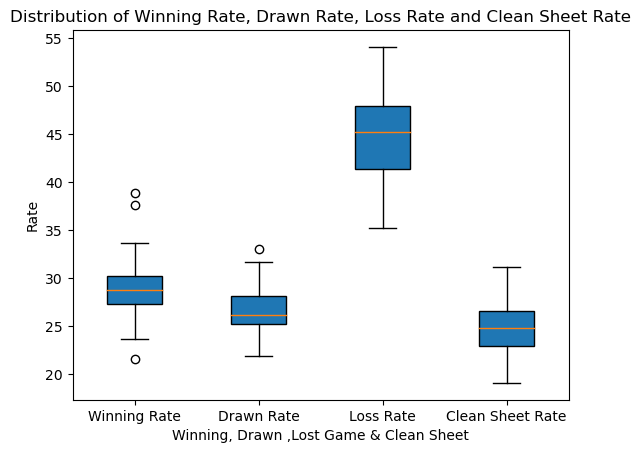

In [49]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
#plt.figure(figsize=(8, 6))

# Creating the boxplot
boxplot = plt.boxplot([df['Winning Rate'], df['Drawn Rate'], df['Loss Rate'], df['Clean Sheet Rate']], 
                      patch_artist=True,
                      labels=['Winning Rate', 'Drawn Rate', 'Loss Rate', 'Clean Sheet Rate'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()

- Here we can see winning rate & drawn rate has outliers means few clubs have high wining & drawn rate compared to others.
- loss rate is high than winning for all the clubs.
- Need to find clubs which are greter than lower outliers based on (winning rate & drawn rate).


In [50]:
# Winning Rate further analysis. Identify clubs with high winning rate

# Calculate the interquartile range for the "Winning Rate" column
Q1 = df['Winning Rate'].quantile(0.25)
Q3 = df['Winning Rate'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper boundaries for potential outliers <-- Expectional high winning rate compared to other teams
upper_bound = Q3 + 1.5 * IQR

# Identify the clubs with high winning rate 
highwinningrate = df[(df['Winning Rate'] > upper_bound)]
highwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0


- if we see Blackburn Rovers have highest winning rate followed by Leeds United.

In [51]:
# Winning Rate further analysis. Identify club with low winning rate

# Calculate the lower boundaries for potential outliers <-- Low winning rate compared to other teams
lower_bound = Q1 - 1.5 * IQR

# Identify the clubs with lowest winning rate 
lowwinningrate = df[(df['Winning Rate'] < lower_bound)]
lowwinningrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
17,Hull City,190,41,101,48,181,58,1904,0.0,0,2017,21.578947,53.157895,25.263158,30.526316,1.0


- Hull city was in lower winning rate as it is not suggested to take by investors. 

In [78]:
# calculating dRAWN RATE for further analysis

# Calculate the interquartile range for the "Drawn Rate" column
Q1 = df['Drawn Rate'].quantile(0.25)
Q3 = df['Drawn Rate'].quantile(0.75)

# calculating interquertilerange 
IQR = Q1 - Q3

# Identifying lower bound & upperbound

upper_bound = Q1 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify the clubs with lowest drawn rate 
high_drawnrate = df[(df['Drawn Rate'] > upper_bound)].sort_values(by = 'Drawn Rate', ascending = False)
high_drawnrate


,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0
7,Coventry City,354,99,143,112,387,92,NaN,0.0,0,2001,27.966102,40.395480,31.638418,25.988701,1.0
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
16,Nottingham Forest,227,66,94,67,253,52,1865,0.0,0,2023,29.074890,41.409692,29.515419,22.907489,1.0
14,Middlesbrough,574,165,240,169,648,147,1876,0.0,0,2017,28.745645,41.811847,29.442509,25.609756,1.0
21,Stoke City,380,116,155,109,398,101,1863,0.0,0,2018,30.526316,40.789474,28.684211,26.578947,1.0
20,Sheffield Wednesday,316,101,126,89,409,78,1867,0.0,0,2000,31.962025,39.873418,28.164557,24.683544,1.0
25,West Bromwich Albion,494,117,238,139,510,107,1878,0.0,0,2018,23.684211,48.178138,28.137652,21.659919,1.0
6,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007,30.592105,42.434211,26.973684,29.934211,1.0
15,Norwich City,392,99,188,105,414,78,1902,0.0,0,2022,25.255102,47.959184,26.785714,19.897959,1.0


- Brighton & Hove Albion club has highest drawn rate means highest winning rate.
- Now we can see other factors like no of winners & runner-up in Premier league to choose the club.

In [52]:
df['Avg Goals Per Match'].describe()

count    29.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

In [53]:
df['Winners'].value_counts()

Winners
0.0    27
1.0     2
Name: count, dtype: int64

In [54]:
df['Runners-up'].value_counts()

Runners-up
0    28
1     1
Name: count, dtype: Int64

In [56]:
df[(df['Winners']==1) | (df['Runners-up']==1)]     # here | is used as 'or'

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [58]:
df['Matches Played'].describe()

count     29.000000
mean     372.482759
std      153.533296
min      190.000000
25%      266.000000
50%      305.000000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

In [57]:
# Let us look at "lastplayed_pl" column
df['lastplayed_pl'].value_counts()

lastplayed_pl
2023    8
2022    3
2017    3
2018    3
2012    2
2011    1
2007    1
2001    1
2008    1
2002    1
2015    1
2021    1
2000    1
2013    1
2010    1
Name: count, dtype: int64

- out of 29 clubs, only 8 clubs are played recently. it is better to take latest experience club rather than others.
- so , we can filter teams with latest experience i.e 2022, 2023.

In [63]:
df[df['lastplayed_pl'] >= 2022]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0
5,Burnley,304,83,145,76,300,78,1882,0.0,0,2022,27.302632,47.697368,25.000000,25.657895,1.0
8,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023,28.759398,45.300752,25.939850,25.000000,1.0
10,Fulham,599,173,266,160,670,160,1879,0.0,0,2023,28.881469,44.407346,26.711185,26.711185,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,2023,38.850174,35.191638,25.958188,31.184669,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,2023,33.644860,40.809969,25.545171,26.012461,1.0
15,Norwich City,392,99,188,105,414,78,1902,0.0,0,2022,25.255102,47.959184,26.785714,19.897959,1.0
16,Nottingham Forest,227,66,94,67,253,52,1865,0.0,0,2023,29.074890,41.409692,29.515419,22.907489,1.0
24,Watford,305,73,165,67,310,62,1881,0.0,0,2022,23.934426,54.098361,21.967213,20.327869,1.0


from above analysis we can say that 
- in terms of experience: Leicester City
- in terms of winners in Premier leugue: Leicester City
- in terms of winning rate: Leeds United
- in terms of drawn rate: Brighton & Hove Albion

so to conclude best out of all, we need to give weights for each factor & calculate the score to get best performaing club.

#### d) Final scores analysis

Let's create a plan to Score each team on the pre defined metric.

- Give a score of 15 if club have a relatively high experience in the Premier League 
- Give a score of 10 if club have matches played above average (372)
- Give a score of 15 if club has won premier league
- Give a score of 15 if club has winning rate above Q3
- Give a score of 10 if club has lossing rate below Q1 and drawn rate above Q3 
- Give a score of 10 if club has clean sheet above Q3 
- Give a score of 10 if club has been a runners-up in premier league.

In [89]:
# Calculate the upper bound for the "Winning Rate" column
upper_bound_WinningRate = df['Winning Rate'].quantile(0.75)

# Calculate the lower bound for the "Loss Rate" column
lower_bound_LosingRate = df['Loss Rate'].quantile(0.25)

# Calculate the upper bound for the "Drawn Rate" column
upper_bound_DrawnRate = df['Drawn Rate'].quantile(0.75)

# Calculate the upper bound for the " Clean Sheet Rate" column
upper_bound_CleanSheetRate = df['Clean Sheet Rate'].quantile(0.75)

In [79]:
len(df)

29

In [80]:
# new column was created to calculate scores
df['scores']=np.zeros(len(df))

In [81]:
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match,scores
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [97]:
df.loc[df['Matches Played'] >= 372, 'scores'] += 15
df.loc[df['Winning Rate'] >= upper_bound_WinningRate, 'scores'] += 15
#df.loc[df['Loss Rate'] <= lower_bound_LosingRate, 'scores'] += 15
df.loc[(df['Drawn Rate'] >= upper_bound_DrawnRate) & (df['Loss Rate'] <= lower_bound_LosingRate), 'scores'] += 10
df.loc[(df['Clean Sheet Rate'] >= upper_bound_CleanSheetRate, 'scores')] += 10
df.loc[df['Winners'] == 1, 'scores'] += 15
df.loc[df['Runners-up'] == 1, 'scores'] += 10
df.loc[df['lastplayed_pl'] == 2023, 'scores'] += 15

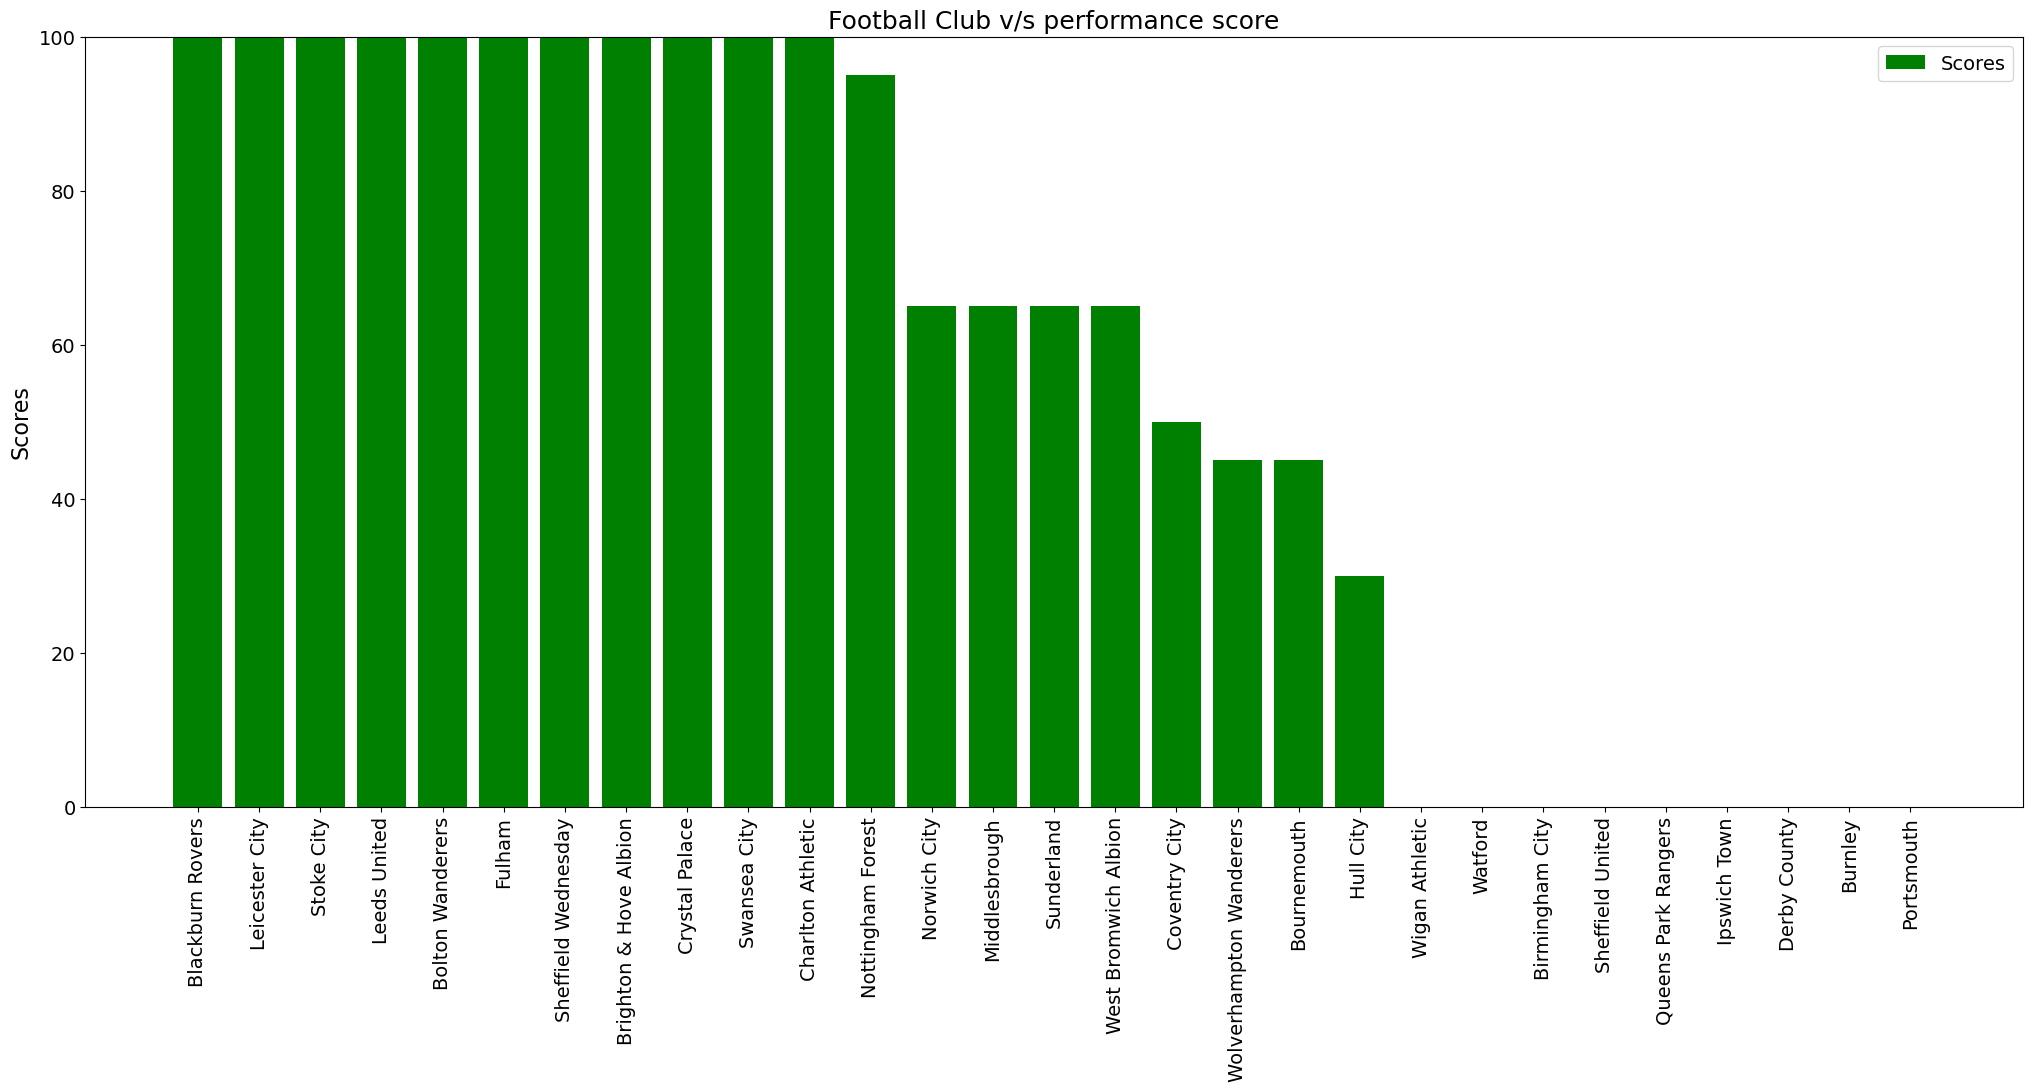

In [100]:
df_sort = df.sort_values(by='scores', ascending=False)

plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='green')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()


**Based on the above chart, Blackburn Rovers has the highest score basis our analysis and next best Leicester City**
- 

In [102]:
df[df['Club']=='Blackburn Rovers']['lastplayed_pl']

1    2012
Name: lastplayed_pl, dtype: int32

if we see the lastest experience of Blackburn Rovers it is 2012 which is very old one.
 - To avoid this,Let us check the score of those clubs that have played in the last three years. 
- Specifically, suggest including clubs that have played in 2023, as well as those that last played in 2022 and 2021. 

This approach allows us to find those clubs that are currently in good form and have consistently performed well over the past few years.

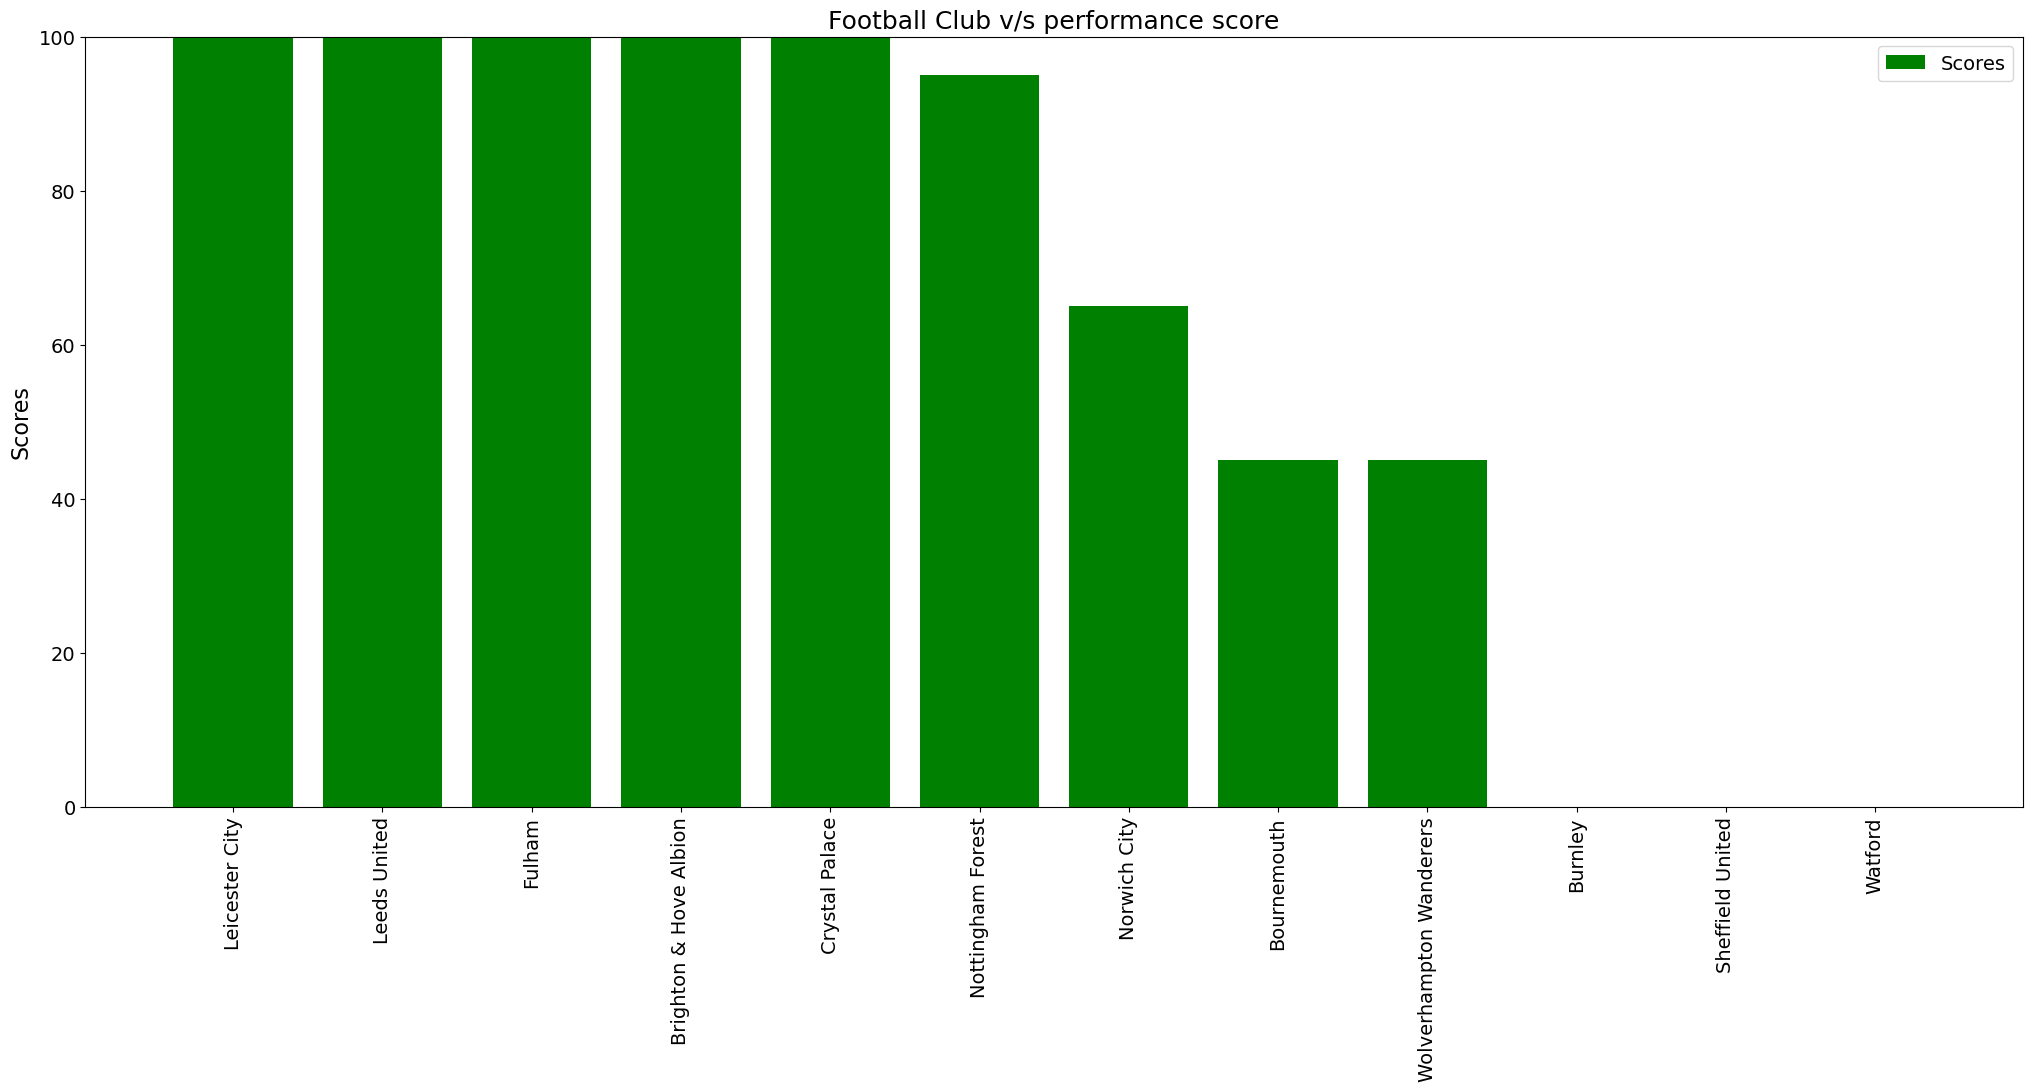

In [101]:
# sort the DataFrame by score in descending order
df_sort = df[(df['lastplayed_pl']>=2021)].sort_values(by='scores', ascending=False)

# create a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(df_sort['Club'], df_sort['scores'], color='green')

# add labels and title to the chart
plt.ylabel('Scores', fontsize=16)
plt.title('Football Club v/s performance score', fontsize=18)

# add legend to explain the blue bars
plt.legend(['Scores'], fontsize=14)

# rotate the team names on the x-axis for readability
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# set the y-axis limit to start from 0 and end at 100
plt.ylim(0, 100)

# display the chart
plt.show()

Based on above analysis we can say that in terms of all scores 'Blackburn Rovers' was on top followed by 'Leicester City' 
- If we closely look the latest experience of both, Leicester City has recently played in 2023, were  Blackburn Rovers was played in 2012 which is quiet long back.

### so that we recommend 'Leicester City's'  is better choice for investment based on recent form and its performance.

To support our claim, we will conduct further secondary research to provide additional evidence of Leicester City's current form and potential for success

According to our research, Blackburn Rovers were relegated to the Championship league in 2012 i.e., league below Premier League and later to League One in 2017 i.e., league below Championship league. However, they were promoted back to the Championship in 2018 and have since finished in the middle of the table in recent years. Given their inconsistent performance and lack of presence in the Premier League since 2012, it would be inappropriate to recommend this club for investment.

On the other hand, Leicester City, the 2016 Premier League champions, have consistently finished in the top 10 in recent years. They placed 5th in both the 2019-2020 and 2020-2021 seasons and finished 8th in 2021-2022. Leicester City has the potential to achieve even greater success in the near future. Therefore, it would be reasonable to recommend Leicester City to our clients.

Source 1: https://www.transfermarkt.co.in/blackburn-rovers/platzierungen/verein/164

Source 2: https://www.transfermarkt.co.in/leicester-city/platzierungen/verein/1003

### Acknoledgement
- Thanks to dataanalystduo for support & guidence throughout the project.
- Thanks to dataanalystduo for providing data set for analysis.